In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wrangle2021 import Wrangler

In [3]:
# 8th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q15A', 'Q15B', 'Q15C']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Attended campaign rally', 'Worked for candidate or party', 'Contacted by party rep']

df_new.head()

,State,Attended campaign rally,Worked for candidate or party,Contacted by party rep
0,IMO,No,No,No
1,FCT ABUJA,Yes,No,No
2,FCT ABUJA,Yes,Yes,No
3,FCT ABUJA,No,No,No
4,FCT ABUJA,No,Yes,Yes


In [2]:
wrangle = Wrangler()

In [3]:
data = wrangle.wrangle(columns = ['REGION','Q15A', 'Q15B', 'Q15C'],
               rename = ['State', 'Attended campaign rally', 'Worked for candidate or party', 'Contacted by party rep'])

In [4]:
data = wrangle.remove(columns=['Attended campaign rally', 'Worked for candidate or party', 'Contacted by party rep'],
                     df_new=data)

In [5]:
wrangle.get_frequency(columns = ['Attended campaign rally', 'Worked for candidate or party', 'Contacted by party rep'],
                     df_new=data)

No     0.747322
Yes    0.252678
Name: Attended campaign rally, dtype: float64
No     0.800882
Yes    0.199118
Name: Worked for candidate or party, dtype: float64
No     0.762445
Yes    0.237555
Name: Contacted by party rep, dtype: float64


In [9]:
# Gets the frequency of the elements of each column
columns = ['Attended campaign rally', 'Worked for candidate or party', 'Contacted by party rep']
for i in columns:
    print(df_new[i].value_counts(normalize=True))

No     0.747322
Yes    0.252678
Name: Attended campaign rally, dtype: float64
No     0.800882
Yes    0.199118
Name: Worked for candidate or party, dtype: float64
No     0.762445
Yes    0.237555
Name: Contacted by party rep, dtype: float64


In [8]:
remove = ["Don't know","Refused"]
columns = ['Attended campaign rally', 'Worked for candidate or party', 'Contacted by party rep']

for j in columns:
    for i in remove:
        df_new = df_new.loc[df_new[j] != i]

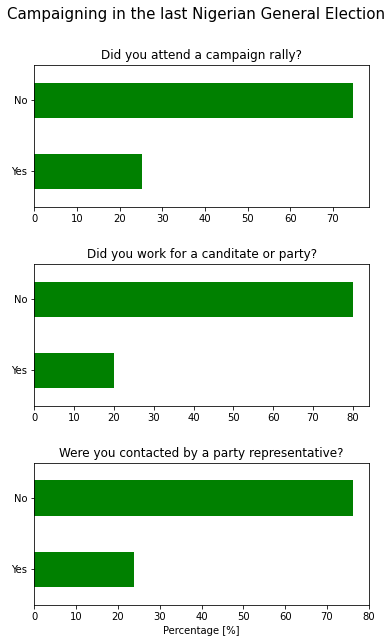

In [13]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.4, top=2)

# Add the main title
fig.suptitle("Campaigning in the last Nigerian General Election", y=2.2, fontsize=15)


# Add the subplots
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)



# Plot for axis 1-4
(df_new['Attended campaign rally'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Worked for candidate or party'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')
(df_new['Contacted by party rep'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax3, color='green')

# Add the text for each subplot
ax1.title.set_text("Did you attend a campaign rally?")
ax2.title.set_text("Did you work for a canditate or party?")
ax3.title.set_text("Were you contacted by a party representative?")

# label
plt.xlabel('Percentage [%]')

plt.show()